![Astrofisica Computacional](../logo.PNG)

---
## 01. Ecuación de Onda

Eduard Larrañaga (ealarranaga@unal.edu.co)

---


### Resumen

Se soluciona numéricamente la ecuación de onda.


---

---

## Ecuación de Onda a partir de las ecuaciones de la MHD

Consideramos ahora las ecuaciones de la MHD en el caso de un fluido desmagnetizado y sin viscosidad. De esta forma la ecuaciones de continuidad y de movimiento serán

\begin{align}
\frac{\partial \rho}{\partial t} + \vec{\nabla} \cdot (\rho \vec{v}) = &0\\
\rho \left( \frac{\partial \vec{v}}{\partial t} +  \vec{v} \cdot \vec{\nabla} \vec{v}\right) = &- \vec{\nabla} P 
\end{align}

Considerando pequeñas perturbaciones alrededor de un estado de equilibrio identificado con las cantidades $P_0, \rho_0$ y $\vec{v}_0 = 0$, se tiene

\begin{equation}
\begin{cases}
P = & P_0 + \delta P\\
\rho = &\rho_0 + \delta \rho\\
\vec{v} = &\delta \vec{v}.
\end{cases}
\end{equation}

donde las perturbaciones se supondrán cantidades pequeñas, i.e. $\delta P, \delta \rho, \delta \vec{v} \sim \epsilon \ll 1 $.

Reemplazando en la ecuación de continuidad y manteniendo solamente ordenes lineales en las perturbaciones se obtiene

\begin{equation}
\frac{\partial \delta \rho}{\partial t} +\rho_0 \vec{\nabla} \cdot \delta \vec{v} = 0.
\end{equation}

De la misma forma, al linealizar la ecuación de movimiento se obtiene

\begin{equation}
\rho_0 \frac{\partial \delta \vec{v}}{\partial t} = - \vec{\nabla} P .
\end{equation}

Asumiendo una ecuación de estado de la forma $P = P(\rho)$, se obtiene la ecuación linealizada

\begin{equation}
\vec{\nabla} \delta P = \left( \frac{dP}{d\rho}\right)_0 \vec{\nabla} \delta \rho,
\end{equation}

y reemplazando en la ecuación de movimiento se tiene

\begin{equation}
\rho_0 \frac{\partial \delta \vec{v}}{\partial t} = - \left( \frac{dP}{d\rho}\right)_0 \vec{\nabla} \delta \rho .
\end{equation}

De esta forma, aplicando el operador $\frac{\partial}{\partial t}$ a la ecuación de continuidad linealizada y el operador $\vec{\nabla}$ a la ecuación de movimiento se obtienen las relaciones

\begin{equation}
\begin{cases}
\frac{\partial^2 \delta \rho}{\partial t^2} &= -\rho_0 \frac{\partial}{\partial t}\vec{\nabla} \cdot \delta \vec{v}\\
\rho_0 \vec{\nabla} \cdot \frac{\partial \delta \vec{v}}{\partial t} &=- \left( \frac{dP}{d\rho}\right)_0 \vec{\nabla} \cdot \vec{\nabla} \delta \rho.
\end{cases}
\end{equation}

Al combinar estas relaciones, se obtiene la ecuación de onda para las perturbaciones de densidad (o presión) en el fluido, i.e. ondas sonoras,

\begin{equation}
\frac{\partial^2 \delta \rho}{\partial t^2} = c_s^2 \nabla^2 \delta \rho,
\end{equation}

donde se ha identificado la velocidad del propagación del sonido dentro del fluido como

\begin{equation}
c_s^2= \left( \frac{dP}{d\rho}\right)_0. 
\end{equation}

---
## Método de Diferencias Finitas

El primer método que se describirá para resolver la ecuación de onda es el de diferencias finitas. Para ilustrarlo, consideramos la ecuación de onda unidimensional,

\begin{equation}
\frac{\partial^2 \psi}{\partial t^2} = v^2 \frac{\partial^2 \psi}{\partial x^2}.
\end{equation}

Utilizando diferencias finitas centradas para las segundas derivadas a ambos lados se obtiene

\begin{equation}
\frac{\psi (t+\Delta t,x) + \psi (t-\Delta t,x ) -2 \psi (t,x)}{\Delta t^2} = \frac{v^2}{\Delta x^2} \left[ \psi (t,x+\Delta x) + \psi (t,x-\Delta x) -2 \psi (t,x)\right].
\end{equation}

De esta expresión se tiene la relación implícita

\begin{equation}
    \psi^{(n+1)}_j  = \alpha \left[ \psi^{(n)}_{j+1} + \psi^{(n)}_{j-1} -2 \psi^{(n)}_{j}\right] +2 \psi^{(n)}_j - \psi^{(n-1)}_j  
\end{equation}

donde $\alpha= \frac{v^2 \Delta t^2}{\Delta x^2}$. Como se nota de esta expresión, el método no se auto-inicializa y por ello debe realizarse un paso hacia atrás en el tiempo para poder comenzar con el proceso de integración.


### Condiciones Iniciales y de Frontera

Con el fin de resolver esta ecuación diferencial, se necesita imponer unas condiciones de iniciales,

\begin{align}
\psi (t=0, x) = &\psi_0 (x)\\
\partial_t \psi (t=0,x) = &\dot{\psi_0} (x),
\end{align}

y unas condiciones de frontera, por ejemplo condiciones de Dirichlet,

\begin{align}
\psi (t, x=a) = &0\\
\psi (t, x=b) = &0,
\end{align}

siendo $a$ y $b$ los extremos de la región espacial de integración.


### Iniciación del Algoritmo

Para iniciar el sistema, se puede calcular el valor de la función de onda en el instante $t=1$ a partir de la condición inicial,

\begin{align}
\partial_t \psi (t=0,x) = &\dot{\psi_0} (x),
\end{align}

e implementando una discretización de diferencias finitas al lado izquierdo,

\begin{align}
\frac{\psi (t=1, x) - \psi (t=0,x)}{\Delta t} = &\dot{\psi_0} (x)\\
\frac{\psi^{(1)}_j - \psi^{(0)}_j}{\Delta t} = &\dot{\psi_0}
\end{align}

\begin{align}
\psi^{(1)}_j = \psi^{(0)}_j + \dot{\psi_0} \Delta t.
\end{align}

Nótese que este es el análogo de un paso tipo Euler para la función de onda.

---

Para ilustrar la implementación de este algoritmo, tomaremos el caso particular con las siguientes condiciones:

- Rango de integración: $x \in [0,1]$
- Condiciónes iniciales:
\begin{align}
\psi (t=0, x) = & \sin (\pi x)\\
\partial_t \psi (t=0,x) = &\sin (\pi x)
\end{align}
- Condiciones de frontera: 
\begin{align}
\psi (t, 0) = &0\\
\psi (t, 1) = &0,
\end{align}
- Velocidad de propagación $v=1$


┌ Info: Saved animation to 
│   fn = /Users/eduard/Downloads/EjerciciosAC2022/09. PDEs V/WaveFunction.gif
└ @ Plots /Users/eduard/.julia/packages/Plots/dNEbX/src/animation.jl:114


Plots.AnimatedGif("/Users/eduard/Downloads/EjerciciosAC2022/09. PDEs V/WaveFunction.gif")
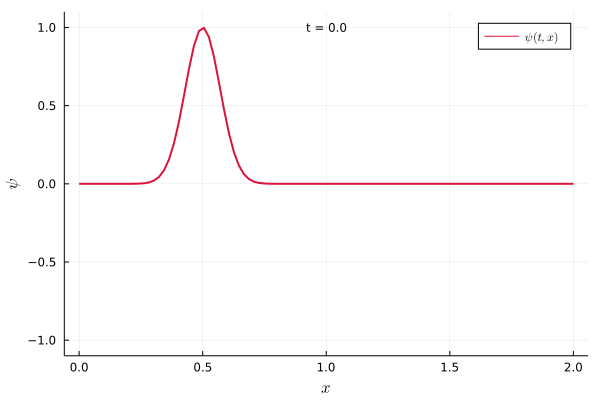

In [7]:
using Plots
using LaTeXStrings


# Definition of the initial profile
function sinusoidal(x)
    return sin(pi*x)
end

function gaussian(x)
    return exp(-(x-0.5)^2/0.01)
end

# Finite Diferences Method
function FD(psi0, tgrid, xgrid)
    # Propagation velocity
    v = 1.
    dx = xgrid[2] - xgrid[1]
    dt = tgrid[2] - tgrid[1]
    alpha = v*dt^2/dx^2
    
    psi = zeros(length(tgrid),length(xgrid))
    # Initial Condition
    psi[1,:] = psi0.(xgrid) # Wave Function
    psidot0 = psi0.(xgrid) # Velocity
    # Inicialization
    psi[2,:] = psi[1,:] + psidot0[:]*dt
    
    for n in 2:length(tgrid)-1
        for j in 2:length(xgrid)-1
            psi[n+1,j] = alpha*(psi[n,j+1] - 2*psi[n,j] + psi[n,j-1]) + 2*psi[n,j] - psi[n-1,j]
        end
        # Dirichlet boundary conditions 
        psi[n+1,1] = 0
        psi[n+1,end] = 0
    end
    return psi
end


# Definition of the grids
x_i = 0.
x_f = 2.
xgrid = LinRange(x_i, x_f, 100)


t_i = 0.
t_f = 20.
dt = 0.0001
tgrid = t_i:dt:t_f


psi = FD(gaussian, tgrid, xgrid)


anim = @animate for i in 1:1500:length(tgrid)
    plot(xgrid, psi[i,:],label=L"\psi(t,x)", lw = 2, linecolor="crimson", ylims=(-1.1,1.1))
    xlabel!(L"x")
    ylabel!(L"\psi")
    annotate!(1,1, text("t = $(round(tgrid[i];digits=2))",8))
end

gif(anim, "WaveFunction.gif", fps = 15)

La evolución temporal se puede ver en su totalidad mediante un gráfico de denisdad,

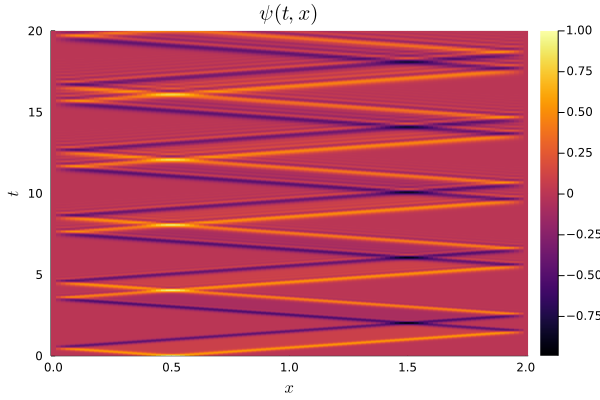

In [8]:
heatmap(xgrid,tgrid,psi)
xlabel!(L"x")
ylabel!(L"t")
title!(L"\psi (t,x)")

---
## Método FTCS

El primer método que se describirá para resolver la ecuación de onda es el **FTCS** (**F**orfward **T**ime, **C**entered **S**pace). Para ilustrarlo, consideramos la ecuación de onda unidimensional,

\begin{equation}
\frac{\partial^2 \psi}{\partial t^2} = v^2 \frac{\partial^2 \psi}{\partial x^2}.
\end{equation}

Dividiendo el rango espacial $x\in [0,L]$ en subintervalos de igual tamaño $\Delta x$, la segunda derivada espacial en el lado derecho de la ecuación se discretiza con diferencias finitas centradas,

\begin{equation}
\frac{\partial^2 \psi }{\partial t^2} = \frac{v^2}{\Delta x^2} \left[ \psi (t,x+\Delta x) + \psi (t,x-\Delta x) -2 \psi (t,x)\right].
\end{equation}

Ahora se reescribe la ecuación diferencial como un conjunto de dos ecuaciones de primer orden introduciendo una nueva función $\phi (t,x)$,

\begin{equation}
\begin{cases}
\frac{d\psi}{dt} = & \phi(t,x)\\
\frac{d\phi}{dt}= &\frac{v^2}{\Delta x^2} \left[ \psi (t,x+\Delta x) + \psi (t,x-\Delta x) -2 \psi (t,x)\right].
\end{cases}
\end{equation}

Para resolver esta sistema de ecuaciones se utiliza el método de Euler,

\begin{equation}
\begin{cases}
\psi(t+\Delta t, x) = & \psi(t,x) +  \phi(t,x) \Delta t \\
\phi(t+\Delta t, x) = & \phi(t,x) + \frac{v^2 \Delta t}{\Delta x^2} \left[ \psi (t,x+\Delta x) -2 \psi (t,x) + \psi (t,x-\Delta x) \right],
\end{cases}
\end{equation}

que se puede re-escribir como ecuaciones iterativas,

\begin{equation}
\begin{cases}
\psi^{(n+1)}_j = & \psi^{(n)}_j +  \phi^{(n)}_j \Delta t\\
\phi^{(n+1)}_j = & \phi^{(n)}_j + \frac{v^2 \Delta t}{\Delta x^2} \left[ \psi^{(n)}_{j+1} -2 \psi^{(n)}_j + \psi^{(n)}_{j-1} \right].
\end{cases}
\end{equation}

El método FTCS es **incondicionalmente inestable** para resolver la ecuación de onda.

---
## Método Implícito

El algoritmo FTCS se puede modificar para mejorar su estabilidad.  Para ello, primero sustituimos $\Delta t \rightarrow -\Delta t$,

\begin{equation}
\begin{cases}
\psi(t-\Delta t, x) = & \psi(t,x) -  \phi(t,x) \Delta t \\
\phi(t-\Delta t, x) = & \phi(t,x) - \frac{v^2 \Delta t}{\Delta x^2} \left[ \psi (t,x+\Delta x) -2 \psi (t,x) + \psi (t,x-\Delta x) \right].
\end{cases}
\end{equation}

Este cambio implica que se esta evolucionando el sistema hacia atrás en el tiempo en un paso de tamaño $\Delta t$, pero ahora se realiza la transformación $t \rightarrow t +\Delta t$ para obtener

\begin{equation}
\begin{cases}
\psi(t, x) = & \psi(t + \Delta t,x) -  \phi(t + \Delta t,x) \Delta t \\
\phi(t, x) = & \phi(t + \Delta t,x) - \frac{v^2 \Delta t}{\Delta x^2} \left[ \psi (t+\Delta t,x+\Delta x) -2 \psi (t+\Delta t,x) + \psi (t+\Delta t,x-\Delta x) \right].
\end{cases}
\end{equation}

Estas ecuaciones se pueden re-acomodar en la forma

\begin{equation}
\begin{cases}
\psi(t + \Delta t,x) -  \phi(t + \Delta t,x) \Delta t &= \psi(t, x)  \\
 \phi(t + \Delta t,x) - \frac{v^2 \Delta t}{\Delta x^2} \left[ \psi (t+\Delta t,x+\Delta x) -2 \psi (t+\Delta t,x) + \psi (t+\Delta t,x-\Delta x) \right] &=\phi(t, x) ,
\end{cases}
\end{equation}

o como la ecuación iterativa

\begin{equation}
\begin{cases}
\psi^{(n+1)}_j -  \phi^{(n+1)}_j \Delta t &= \psi^{(n)}_j  \\
 \phi^{(n+1)}_j - \frac{v^2 \Delta t}{\Delta x^2} \left[ \psi^{(n+1)}_{j+1} -2 \psi ^{(n+1)}_{j} + \psi ^{(n+1)}_{j-1} \right] &=\phi^{(n)}_{j}.
\end{cases}
\end{equation}

Claramente este es un **método implícito** que no permite obtener la solución de forma directa. Sin embargo, el conjunto de ecuaciones puede ser escrito como un sistema lineal de ecuaciones simultaneas para $\psi$ y $\phi$ en cada punto de la malla que uede resolverse por métodos estandard como la eliminación Gaussiana. 

Aunque este método implica la solución de un sistema lineal en cada punto y por ello es más lento que el  FTCS, tiene l ventaja de ser **incondicionalmente estable** para resolver la ecuaciónd e onda. 

---

## Método de Crank-Nicolson

El método de Crank-Nicolson es un híbrido entre le método FTCS y el implícito. Las ecuaciones correspondientes se obtienen tomando el promedio de las ecuaciones de estos dos métodos. El resultado es

\begin{equation}
\begin{cases}
\psi(t + \Delta t,x) -  \frac{1}{2} \phi(t + \Delta t,x) \Delta t = \psi(t, x) + \frac{1}{2}\phi(t ,x) \Delta t \\
 \phi(t + \Delta t,x) - \frac{v^2 \Delta t}{2 \Delta x^2} \left[ \psi (t+\Delta t,x+\Delta x) -2 \psi (t+\Delta t,x) + \psi (t+\Delta t,x-\Delta x) \right] =\phi(t, x) + \frac{v^2 \Delta t}{2 \Delta x^2} \left[ \psi (t,x+\Delta x) -2 \psi (t,x) + \psi (t,x-\Delta x) \right],
\end{cases}
\end{equation}

o como relación de recurrencia,

\begin{equation}
\begin{cases}
\psi^{(n+1)}_j - \frac{1}{2} \phi^{(n+1)}_j \Delta t = \psi^{(n)}_j  + \frac{1}{2} \phi^{(n)}_j \Delta t\\
 \phi^{(n+1)}_j - \frac{v^2 \Delta t}{2\Delta x^2} \left[ \psi^{(n+1)}_{j+1} -2 \psi ^{(n+1)}_{j} + \psi ^{(n+1)}_{j-1} \right] =\phi^{(n)}_{j} + \frac{v^2 \Delta t}{2\Delta x^2} \left[ \psi^{(n)}_{j+1} -2 \psi ^{(n)}_{j} + \psi ^{(n)}_{j-1} \right].
\end{cases}
\end{equation}